In [9]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/data/star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
df["class"].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [6]:
X = df.drop('class', axis=1)
y = df['class']

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit


splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Split
for train_index, test_index in splitter.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [19]:

rf=RandomForestClassifier(max_depth=11)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11)

In [25]:
from sklearn.metrics import accuracy_score

y_pred = rf.predict(X_test)

accuracy_score(y_pred=y_pred, y_true=y_test)

0.9766333333333334

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

In [28]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1, gamma='scale')  # You can also try 'linear' or tune C/gamma
svm_model.fit(X_train, y_train)

SVC(C=1)

In [29]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9562
              precision    recall  f1-score   support

      GALAXY       0.96      0.97      0.96     17834
         QSO       0.97      0.89      0.93      5688
        STAR       0.94      0.97      0.96      6478

    accuracy                           0.96     30000
   macro avg       0.96      0.95      0.95     30000
weighted avg       0.96      0.96      0.96     30000



In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[17305,   167,   362],
       [  601,  5075,    12],
       [  172,     0,  6306]])

<Axes: >

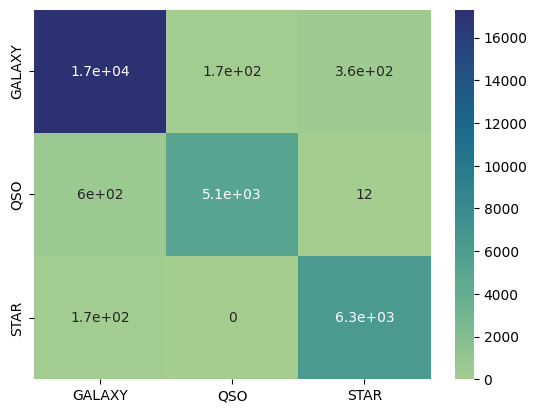

In [32]:
sns.heatmap(cm, annot=True, xticklabels=rf.classes_, yticklabels=rf.classes_, cmap='crest')